This script reads experimental results derived from EC072 progrenesis analysis.

Data available is both normalized and raw. Visualize both and decide.

B11 and B12 are two batches of experiment 1
B21 and B22 are two batches of experiment 2

In [1]:
import pandas, numpy, seaborn

In [2]:
import sklearn, sklearn.preprocessing, sklearn.decomposition

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16, 9), 
                            'axes.labelsize':20
                           })

# user-defined variables

In [4]:
experiment_one_input_file = '/home/adrian/projects/vigur/data/lipidomics/072/progenesis/HPMVEC_POSB1_1andB1_2.csv'

metadata_file = '/home/adrian/projects/vigur/data/lipidomics/072/xcms/pos/EC-072 SAMPLE LIST_BATCHES_FORLCMS_INTRA_Lipidomics_FINAL_23032022.xlsx'

# read information

## 2.1. read data

In [5]:
df = pandas.read_csv(experiment_one_input_file, skiprows=2, index_col=0)
print(df.shape)
df.head()

(492, 208)


,Neutral mass (Da),m/z,Charge,Retention time (min),Chromatographic peak width (min),Identifications,Anova (p),q Value,Max Fold Change,Highest Mean,...,Accepted Compound ID,Accepted Description,Adducts,Formula,Score,Fragmentation Score,Mass Error (ppm),Isotope Similarity,Retention Time Error (mins),Compound Link
Compound,,,,,,,,,,,,,,,,,,,,,
4.32_600.2622m/z,NaN,600.262199,1,4.318533,0.064850,0,0.0,0.0,38373.851947,POS_072-47_5 µM nor_4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.17_319.1463m/z,NaN,319.146338,1,2.172350,0.205817,0,0.0,0.0,6885.376378,POS_072-38_0 µM_0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.29_300.9931m/z,NaN,300.993056,1,2.286283,0.249517,0,0.0,0.0,3725.864457,POS_072-60_5 µM nor_24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.84_338.3429m/z,NaN,338.342896,1,4.844133,0.682783,0,0.0,0.0,456.265724,POS_072-68_TNFa_24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.49_153.1628m/z,NaN,153.162806,1,4.486533,0.406233,0,0.0,0.0,396.227124,POS_072-41_0µM_4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.2. read metadata

In [6]:
metadata = pandas.read_excel(metadata_file, sheet_name='Master Sample List POS', index_col='File')
metadata.head()

,LCMS_SAMPLE,MS file,LC file,Sample ID,Experiment,Timepoint,Treatment,Rep,M/R/C,Total cells per well,Cell Count,MS BATCH,MS BATCH.1,Polarity
File,,,,,,,,,,,,,,
EC72_Lipidomics_000094,Solvent,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2_1,POS
EC72_Lipidomics_000095,Pool,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2_1,POS
EC72_Lipidomics_000096,Solvent,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2_1,POS
EC72_Lipidomics_000097,POS_072-153_5 µM epi:nor_24,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-153,2.0,24.0,5 µM epi:nor,1.0,C,3.33*10^5,333000.0,2.0,B2_1,POS
EC72_Lipidomics_000098,POS_072-156_TNFa_24,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-156,2.0,24.0,TNFa,1.0,C,3.40*10^5,340000.0,2.0,B2_1,POS


# manipulate data

Samples 285 to 405 are the appropriate.

In [7]:
normalized_data = df.iloc[:, 26:92]
print(list(normalized_data.columns)[:10])
print(list(normalized_data.columns)[-10:])
print(normalized_data.shape)
normalized_data.head()

['EC72_Lipidomics_000285', 'EC72_Lipidomics_000361', 'EC72_Lipidomics_000286', 'EC72_Lipidomics_000362', 'EC72_Lipidomics_000287', 'EC72_Lipidomics_000363', 'EC72_Lipidomics_000288', 'EC72_Lipidomics_000364', 'EC72_Lipidomics_000289', 'EC72_Lipidomics_000365']
['EC72_Lipidomics_000325', 'EC72_Lipidomics_000401', 'EC72_Lipidomics_000326', 'EC72_Lipidomics_000402', 'EC72_Lipidomics_000327', 'EC72_Lipidomics_000403', 'EC72_Lipidomics_000328', 'EC72_Lipidomics_000404', 'EC72_Lipidomics_000329', 'EC72_Lipidomics_000405']
(492, 66)


,EC72_Lipidomics_000285,EC72_Lipidomics_000361,EC72_Lipidomics_000286,EC72_Lipidomics_000362,EC72_Lipidomics_000287,EC72_Lipidomics_000363,EC72_Lipidomics_000288,EC72_Lipidomics_000364,EC72_Lipidomics_000289,EC72_Lipidomics_000365,...,EC72_Lipidomics_000325,EC72_Lipidomics_000401,EC72_Lipidomics_000326,EC72_Lipidomics_000402,EC72_Lipidomics_000327,EC72_Lipidomics_000403,EC72_Lipidomics_000328,EC72_Lipidomics_000404,EC72_Lipidomics_000329,EC72_Lipidomics_000405
Compound,,,,,,,,,,,,,,,,,,,,,
4.32_600.2622m/z,6.921601e+03,9.957320e+03,8.147041e+03,8.348015e+03,6.921453e+03,6.613329e+03,3.958309e+03,8.475500e+03,7.441671e+03,8.428044e+03,...,1.250039e+04,9.468955e+03,1.128564e+04,5.570780e+03,9.991603e+03,9.291879e+03,8.878265e+03,6.217605e+03,8.539308e+03,9.123581e+03
2.17_319.1463m/z,5.928276e+02,3.703880e+02,1.270376e+03,7.679636e+02,1.165555e+03,4.826311e+02,1.386554e+03,4.154348e+02,1.269918e+03,5.452881e+02,...,6.352560e+02,1.120133e+03,1.578098e+03,1.344297e+03,6.337141e+02,1.144993e+03,1.359282e+03,1.423035e+03,1.225350e+03,1.135414e+03
2.29_300.9931m/z,5.729191e+05,8.655389e+05,1.090752e+06,8.518499e+05,1.086979e+06,7.302385e+05,1.398723e+06,7.643245e+05,7.008358e+05,7.675529e+05,...,1.412640e+06,1.526694e+06,1.535494e+06,6.931479e+05,1.366936e+06,1.698946e+06,1.301814e+06,1.409599e+06,1.377037e+06,1.419333e+06
4.84_338.3429m/z,3.020683e+07,1.704607e+07,2.004034e+07,2.591869e+07,1.842224e+07,2.352563e+07,2.528577e+07,2.149803e+07,2.177329e+07,2.916631e+07,...,8.868864e+06,2.750696e+07,1.588395e+07,1.917582e+07,1.814139e+07,2.230074e+07,2.475583e+07,2.764402e+07,2.663901e+07,2.574934e+07
4.49_153.1628m/z,1.312908e+04,8.748080e+03,2.925252e+03,4.901292e+03,6.829981e+03,7.709425e+03,3.386358e+02,8.608963e+02,4.967945e+03,6.087364e+03,...,4.938655e+03,2.484085e+03,5.641801e+04,3.511399e+04,9.109185e+02,9.944245e+01,3.634800e+03,2.669586e+03,5.456621e+03,3.798036e+03


In [8]:
log_df = numpy.log10(normalized_data+1)
log_df.head()

,EC72_Lipidomics_000285,EC72_Lipidomics_000361,EC72_Lipidomics_000286,EC72_Lipidomics_000362,EC72_Lipidomics_000287,EC72_Lipidomics_000363,EC72_Lipidomics_000288,EC72_Lipidomics_000364,EC72_Lipidomics_000289,EC72_Lipidomics_000365,...,EC72_Lipidomics_000325,EC72_Lipidomics_000401,EC72_Lipidomics_000326,EC72_Lipidomics_000402,EC72_Lipidomics_000327,EC72_Lipidomics_000403,EC72_Lipidomics_000328,EC72_Lipidomics_000404,EC72_Lipidomics_000329,EC72_Lipidomics_000405
Compound,,,,,,,,,,,,,,,,,,,,,
4.32_600.2622m/z,3.840269,3.998186,3.911053,3.921635,3.840260,3.820486,3.597619,3.928217,3.871729,3.925778,...,4.096958,3.976348,4.052565,3.745994,3.999679,3.968150,3.948377,3.793693,3.931474,3.960213
2.17_319.1463m/z,2.773660,2.569828,3.104274,2.885906,3.066905,2.684514,3.142250,2.619547,3.104117,2.737422,...,2.803632,3.049657,3.198409,3.128818,2.802578,3.059182,3.133629,3.153521,3.088614,3.055537
2.29_300.9931m/z,5.758094,5.937287,6.037727,5.930364,6.036222,5.863465,6.145732,5.883278,5.845617,5.885109,...,6.150032,6.183752,6.186249,5.840827,6.135749,6.230180,6.114549,6.149096,6.138946,6.152085
4.84_338.3429m/z,7.480105,7.231624,7.301905,7.413613,7.265343,7.371541,7.402876,7.332399,7.337924,7.464881,...,6.947868,7.439443,7.200959,7.282754,7.258671,7.348319,7.393677,7.441601,7.425518,7.410766
4.49_153.1628m/z,4.118267,3.941962,3.466312,3.690399,3.834483,3.887078,2.531013,2.935455,3.696264,3.784501,...,3.693697,3.395341,4.751425,4.545493,2.959956,2.001917,3.560600,3.426606,3.737003,3.579673


# visualization before QN

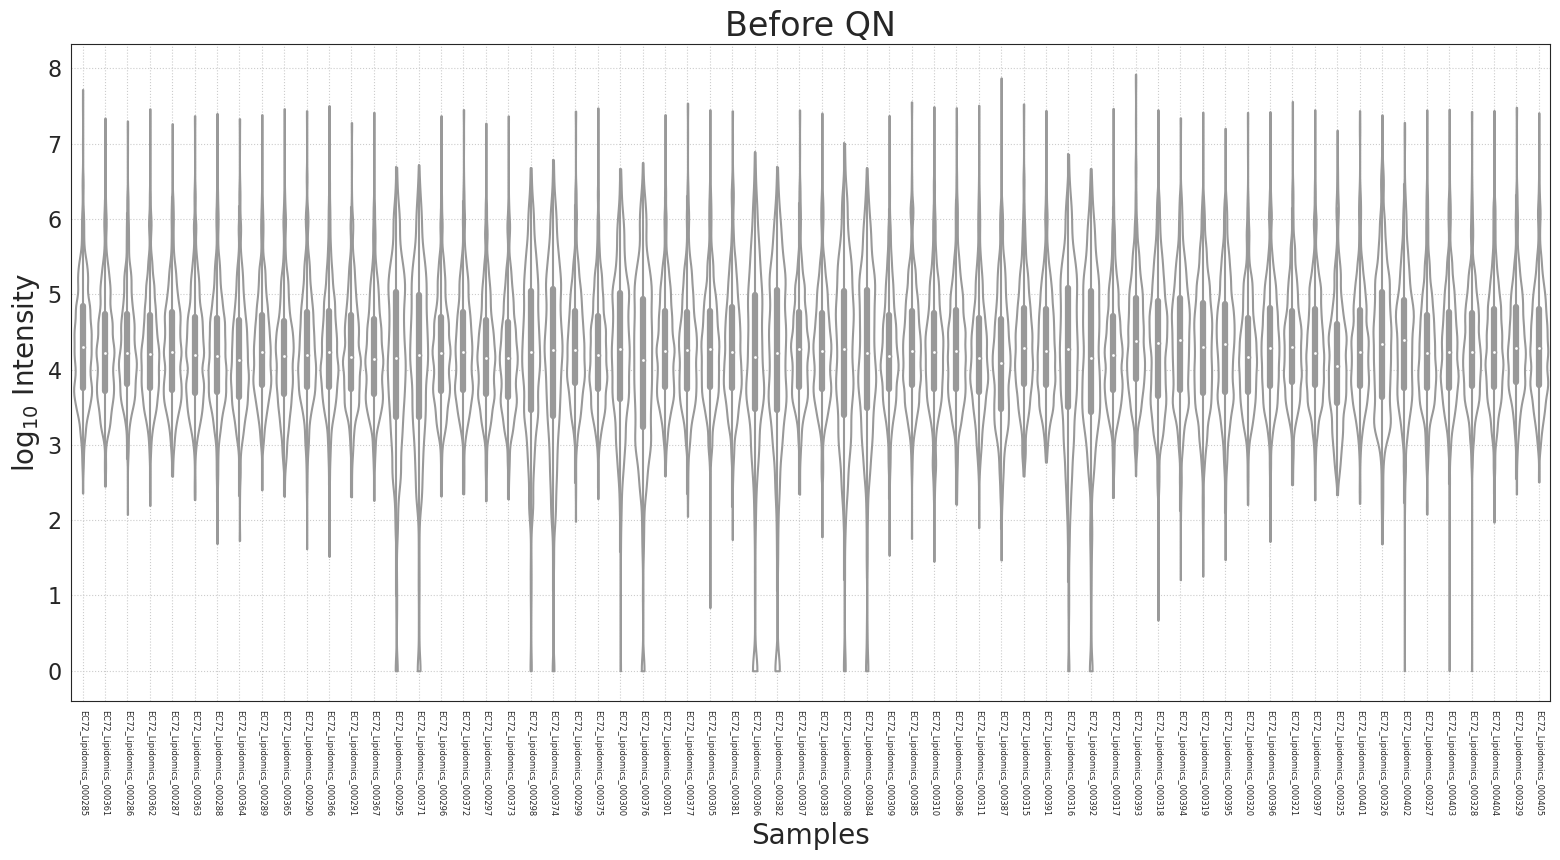

In [9]:
seaborn.set_style("white")
g = seaborn.violinplot(data=log_df, cut=0, bw=.15, scale="count", color='white')
g.set(ylabel='log$_{10}$ Intensity', xlabel='Samples', title='Before QN')
g.set_xticklabels(g.get_xticklabels(), rotation=-90, fontsize=6)

matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

variance explained [0.50319454 0.08562169]
(66, 2)


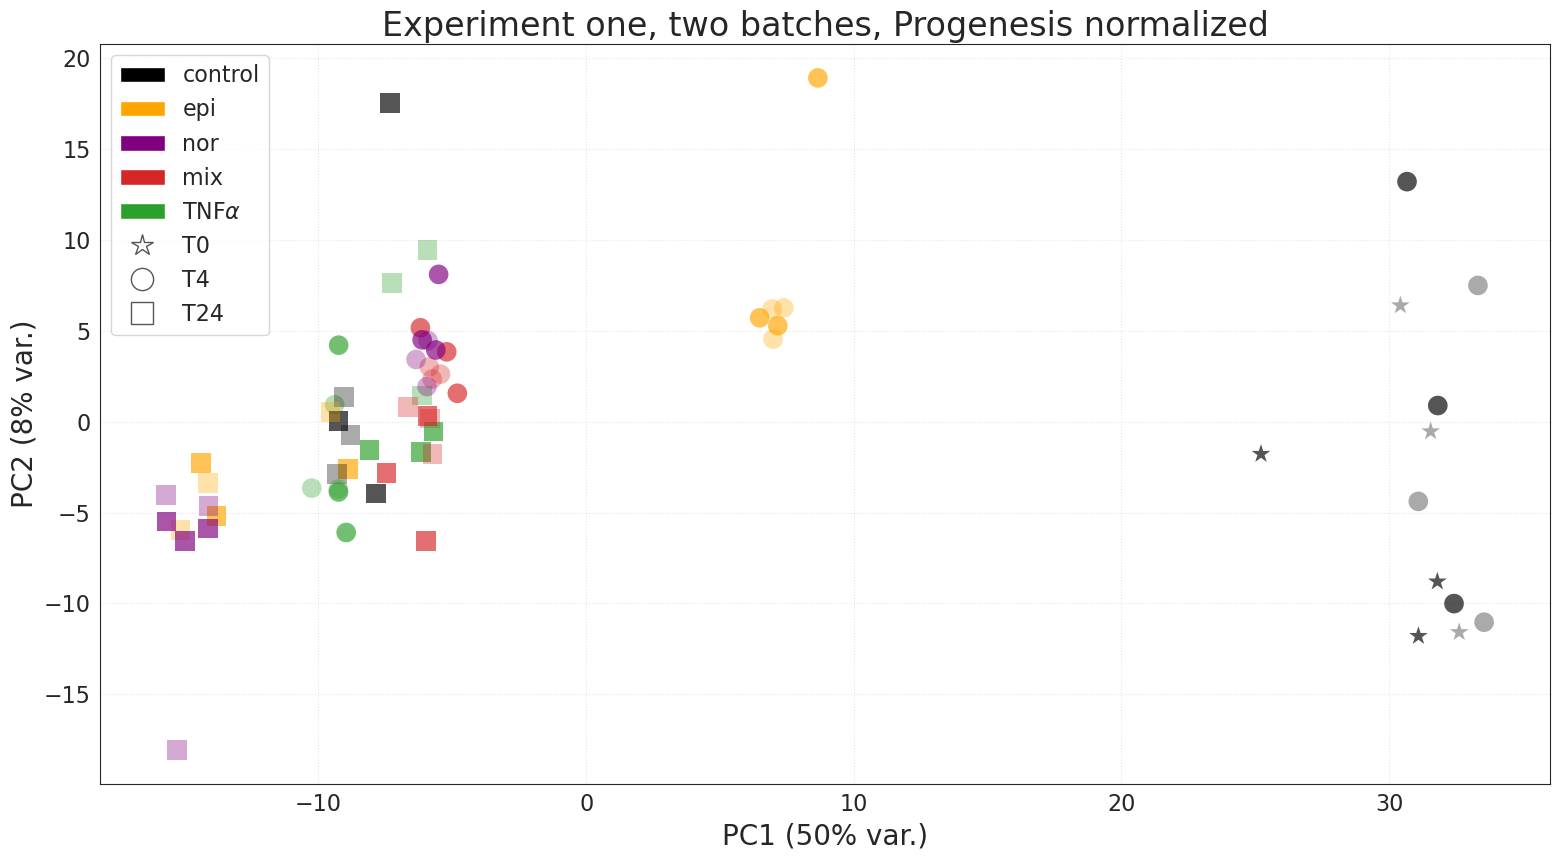

In [10]:
pca_data = log_df.transpose()

x = sklearn.preprocessing.StandardScaler().fit_transform(pca_data)
pca = sklearn.decomposition.PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principal_df = pandas.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

print('variance explained', pca.explained_variance_ratio_)

print(principal_df.shape)
principal_df.head()

#
# scatter plot
#
for i in range(len(pca_data.index)):
    
    label = pca_data.index[i]
    #print(label)
    
    # color for treatment
    treatment = metadata.loc[label, 'Treatment']
    if treatment == '0 µM' or treatment == '0µM':
        plotting_color = 'black'
    elif treatment == '5 µM epi':
        plotting_color = 'orange'
    elif treatment == '5 µM nor':
        plotting_color = 'purple'
    elif treatment == '5 µM epi:nor':
        plotting_color = 'tab:red'
    elif treatment == 'TNFa':
        plotting_color = 'tab:green'
    else:
        raise ValueError('treatment not detected')
        
    # marker for time point
    time_point = metadata.loc[label, 'Timepoint']
    if time_point == 0:
         plotting_marker = '*'
    elif time_point == 4:
         plotting_marker = 'o'
    elif time_point == 24:
         plotting_marker = 's'
    else:
        raise ValueError('timepoint not detected')
    
    # alpha for batch
    batchID = metadata.loc[label, 'MS BATCH.1']
    #print(batchID)
    if batchID[-1] == '1':
         plotting_alpha = 2/3
    elif batchID[-1] == '2':
         plotting_alpha = 1/3
    else:
        raise ValueError('batch not detected')
    
    
    # position
    posx = principal_df.iloc[i]['PC1']
    posy = principal_df.iloc[i]['PC2']

    # plot the dots
    matplotlib.pyplot.scatter(posx, posy, s=200, c=plotting_color, alpha=plotting_alpha, marker=plotting_marker, edgecolors='none')
    
# legend
legend_elements = [
    matplotlib.patches.Patch(facecolor='black', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='orange', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='purple', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:green', edgecolor='white'),
    
    matplotlib.lines.Line2D([0], [0], marker='*', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0),
    matplotlib.lines.Line2D([0], [0], marker='o', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0),
    matplotlib.lines.Line2D([0], [0], marker='s', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0)
    ]
matplotlib.pyplot.legend(legend_elements, ['control', 'epi', 'nor', 'mix', 'TNF$\\alpha$', 'T0', 'T4', 'T24'], fontsize=16)

# close figure
matplotlib.pyplot.title('Experiment one, two batches, Progenesis normalized')
matplotlib.pyplot.grid(alpha=1/2, ls=':')
matplotlib.pyplot.xlabel('PC1 ({}% var.)'.format(int(pca.explained_variance_ratio_[0]*100)))
matplotlib.pyplot.ylabel('PC2 ({}% var.)'.format(int(pca.explained_variance_ratio_[1]*100)))

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [11]:
# consider seeing the effect of quantile normalization, build volcano plots and then venn diagrams for n-1 responding features (three out of four)

# quantile normalization

In [12]:
###
### quantile normalization |  taken from https://cmdlinetips.com/2020/06/computing-quantile-normalization-in-python/
###

# step 1/3: sorting sample values
df_sorted = pandas.DataFrame(numpy.sort(log_df.values, axis=0), 
                             index=log_df.index, 
                             columns=log_df.columns)
# step 2/3: averaging rank values across samples
df_mean = df_sorted.mean(axis=1)
df_mean.index = numpy.arange(1, len(df_mean) + 1)
# step 3/3: re-ordering samples
df_qn = log_df.rank(method="min").stack().astype(int).map(df_mean).unstack()

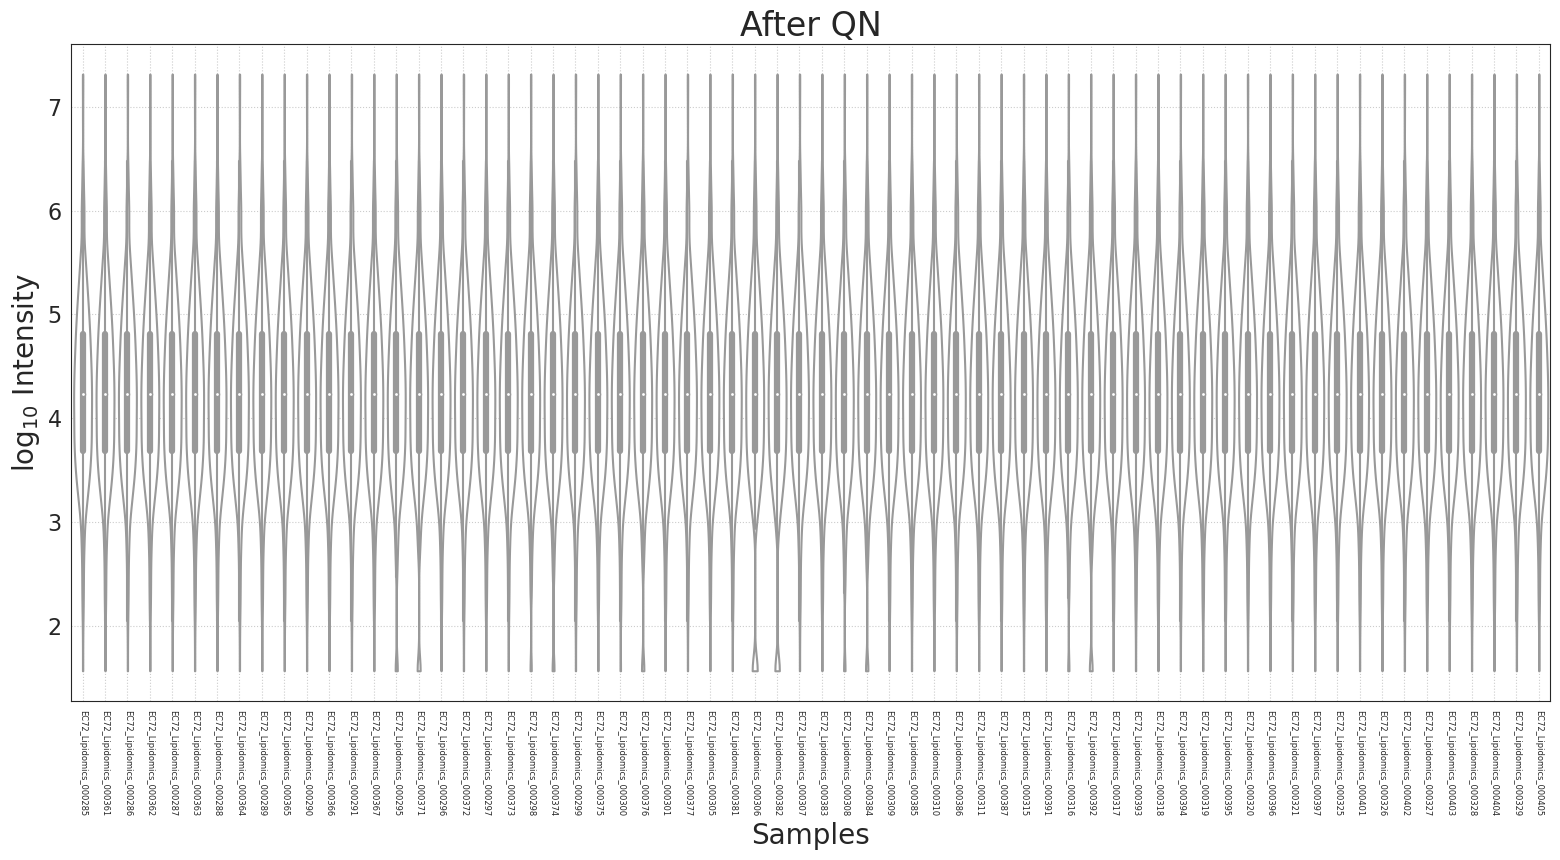

In [13]:
seaborn.set_style("white")
g = seaborn.violinplot(data=df_qn, cut=0, bw=.15, scale="count", color='white')
g.set(ylabel='log$_{10}$ Intensity', xlabel='Samples', title='After QN')
g.set_xticklabels(g.get_xticklabels(), rotation=-90, fontsize=6)

matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

# visualization after QN

variance explained [0.4633186  0.09906443]
(66, 2)


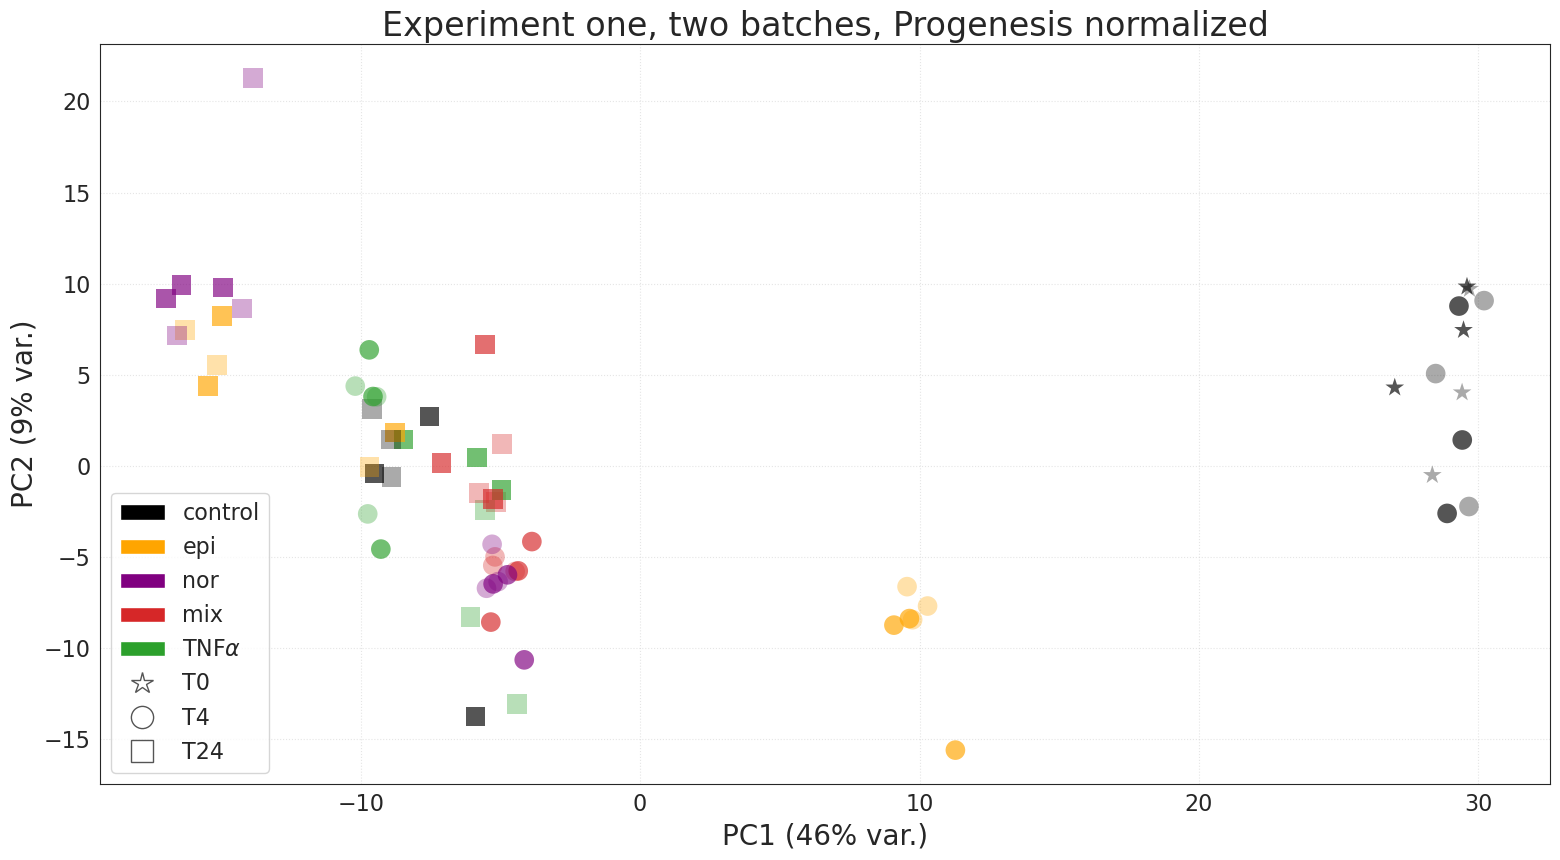

In [14]:
pca_data = df_qn.transpose()

x = sklearn.preprocessing.StandardScaler().fit_transform(pca_data)
pca = sklearn.decomposition.PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principal_df = pandas.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

print('variance explained', pca.explained_variance_ratio_)

print(principal_df.shape)
principal_df.head()

#
# scatter plot
#
for i in range(len(pca_data.index)):
    
    label = pca_data.index[i]
    #print(label)
    
    # color for treatment
    treatment = metadata.loc[label, 'Treatment']
    if treatment == '0 µM' or treatment == '0µM':
        plotting_color = 'black'
    elif treatment == '5 µM epi':
        plotting_color = 'orange'
    elif treatment == '5 µM nor':
        plotting_color = 'purple'
    elif treatment == '5 µM epi:nor':
        plotting_color = 'tab:red'
    elif treatment == 'TNFa':
        plotting_color = 'tab:green'
    else:
        raise ValueError('treatment not detected')
        
    # marker for time point
    time_point = metadata.loc[label, 'Timepoint']
    if time_point == 0:
         plotting_marker = '*'
    elif time_point == 4:
         plotting_marker = 'o'
    elif time_point == 24:
         plotting_marker = 's'
    else:
        raise ValueError('timepoint not detected')
    
    # alpha for batch
    batchID = metadata.loc[label, 'MS BATCH.1']
    #print(batchID)
    if batchID[-1] == '1':
         plotting_alpha = 2/3
    elif batchID[-1] == '2':
         plotting_alpha = 1/3
    else:
        raise ValueError('batch not detected')
    
    
    # position
    posx = principal_df.iloc[i]['PC1']
    posy = principal_df.iloc[i]['PC2']

    # plot the dots
    matplotlib.pyplot.scatter(posx, posy, s=200, c=plotting_color, alpha=plotting_alpha, marker=plotting_marker, edgecolors='none')
    
# legend
legend_elements = [
    matplotlib.patches.Patch(facecolor='black', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='orange', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='purple', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:green', edgecolor='white'),
    
    matplotlib.lines.Line2D([0], [0], marker='*', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0),
    matplotlib.lines.Line2D([0], [0], marker='o', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0),
    matplotlib.lines.Line2D([0], [0], marker='s', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0)
    ]
matplotlib.pyplot.legend(legend_elements, ['control', 'epi', 'nor', 'mix', 'TNF$\\alpha$', 'T0', 'T4', 'T24'], fontsize=16)

# close figure
matplotlib.pyplot.title('Experiment one, two batches, Progenesis normalized')
matplotlib.pyplot.grid(alpha=1/2, ls=':')
matplotlib.pyplot.xlabel('PC1 ({}% var.)'.format(int(pca.explained_variance_ratio_[0]*100)))
matplotlib.pyplot.ylabel('PC2 ({}% var.)'.format(int(pca.explained_variance_ratio_[1]*100)))

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

# visualize volcano plot

In [15]:
metadata

,LCMS_SAMPLE,MS file,LC file,Sample ID,Experiment,Timepoint,Treatment,Rep,M/R/C,Total cells per well,Cell Count,MS BATCH,MS BATCH.1,Polarity
File,,,,,,,,,,,,,,
EC72_Lipidomics_000094,Solvent,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2_1,POS
EC72_Lipidomics_000095,Pool,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2_1,POS
EC72_Lipidomics_000096,Solvent,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2_1,POS
EC72_Lipidomics_000097,POS_072-153_5 µM epi:nor_24,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-153,2.0,24.0,5 µM epi:nor,1.0,C,3.33*10^5,333000.0,2.0,B2_1,POS
EC72_Lipidomics_000098,POS_072-156_TNFa_24,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-156,2.0,24.0,TNFa,1.0,C,3.40*10^5,340000.0,2.0,B2_1,POS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EC72_Lipidomics_000404,POS_072-51_TNFa_4,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-51,1.0,4.0,TNFa,1.0,C,2.26*10^5,226000.0,1.0,B1_2,POS
EC72_Lipidomics_000405,POS_072-53_TNFa_4,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-53,1.0,4.0,TNFa,3.0,C,2.26*10^5,226000.0,1.0,B1_2,POS
EC72_Lipidomics_000406,Solvent,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B1_2,POS


In [16]:
  metadata
    

,LCMS_SAMPLE,MS file,LC file,Sample ID,Experiment,Timepoint,Treatment,Rep,M/R/C,Total cells per well,Cell Count,MS BATCH,MS BATCH.1,Polarity
File,,,,,,,,,,,,,,
EC72_Lipidomics_000094,Solvent,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2_1,POS
EC72_Lipidomics_000095,Pool,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2_1,POS
EC72_Lipidomics_000096,Solvent,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2_1,POS
EC72_Lipidomics_000097,POS_072-153_5 µM epi:nor_24,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-153,2.0,24.0,5 µM epi:nor,1.0,C,3.33*10^5,333000.0,2.0,B2_1,POS
EC72_Lipidomics_000098,POS_072-156_TNFa_24,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-156,2.0,24.0,TNFa,1.0,C,3.40*10^5,340000.0,2.0,B2_1,POS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EC72_Lipidomics_000404,POS_072-51_TNFa_4,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-51,1.0,4.0,TNFa,1.0,C,2.26*10^5,226000.0,1.0,B1_2,POS
EC72_Lipidomics_000405,POS_072-53_TNFa_4,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-53,1.0,4.0,TNFa,3.0,C,2.26*10^5,226000.0,1.0,B1_2,POS
EC72_Lipidomics_000406,Solvent,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B1_2,POS


In [32]:
treatments = ['epi', 'nor', 'epi:nor', 'TNFa']
time_points = [4, 24]
for time_point in time_points:
    for treatment in treatments:
        print(time_point, treatment)
        
        # select control samples
        rules = ((metadata['Treatment'] == '0 µM') | (metadata['Treatment'] == '0µM')) & (metadata['Timepoint'] == time_point)
        control_samples = metadata[rules]
        
        rules = (metadata['Treatment'] == treatment) & (metadata['Timepoint'] == time_point)
        treatment_samples = metadata[rules]
        # .index.to_list()

treatment_samples

4 epi
4 nor
4 epi:nor
4 TNFa
24 epi
24 nor
24 epi:nor
24 TNFa


,LCMS_SAMPLE,MS file,LC file,Sample ID,Experiment,Timepoint,Treatment,Rep,M/R/C,Total cells per well,Cell Count,MS BATCH,MS BATCH.1,Polarity
File,,,,,,,,,,,,,,
EC72_Lipidomics_000098,POS_072-156_TNFa_24,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-156,2.0,24.0,TNFa,1.0,C,3.40*10^5,340000.0,2.0,B2_1,POS
EC72_Lipidomics_000107,POS_072-157_TNFa_24,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-157,2.0,24.0,TNFa,2.0,C,3.40*10^5,340000.0,2.0,B2_1,POS
EC72_Lipidomics_000131,POS_072-158_TNFa_24,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-158,2.0,24.0,TNFa,3.0,C,3.40*10^5,340000.0,2.0,B2_1,POS
EC72_Lipidomics_000170,POS_072-156_TNFa_24,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-156,2.0,24.0,TNFa,1.0,C,3.40*10^5,340000.0,2.0,B2_2,POS
EC72_Lipidomics_000179,POS_072-157_TNFa_24,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-157,2.0,24.0,TNFa,2.0,C,3.40*10^5,340000.0,2.0,B2_2,POS
EC72_Lipidomics_000203,POS_072-158_TNFa_24,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-158,2.0,24.0,TNFa,3.0,C,3.40*10^5,340000.0,2.0,B2_2,POS
EC72_Lipidomics_000289,POS_072-67_TNFa_24,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-67,1.0,24.0,TNFa,2.0,C,2.73*10^5,273000.0,1.0,B1_1,POS
EC72_Lipidomics_000297,POS_072-66_TNFa_24,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-66,1.0,24.0,TNFa,1.0,C,2.73*10^5,273000.0,1.0,B1_1,POS
EC72_Lipidomics_000317,POS_072-68_TNFa_24,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-68,1.0,24.0,TNFa,3.0,C,2.73*10^5,273000.0,1.0,B1_1,POS


In [18]:
# define sets of differentially observed features